In [50]:
import numpy as np
import pandas as pd

In [51]:
df=pd.read_csv('student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


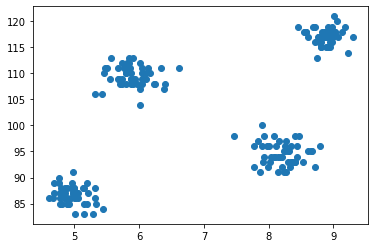

In [52]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [53]:
!pip show threadpoolctl

Name: threadpoolctl
Version: 3.1.0
Summary: threadpoolctl
Home-page: https://github.com/joblib/threadpoolctl
Author: Thomas Moreau
Author-email: thomas.moreau.2010@gmail.com
License: BSD-3-Clause
Location: c:\programdata\anaconda3\lib\site-packages
Requires: 
Required-by: scikit-learn


In [54]:
from sklearn.cluster import KMeans

In [55]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
  
    wcss.append(km.inertia_)

In [56]:
wcss

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 514.1616803171117,
 388.8524026875981,
 303.53129837048647,
 233.54082485509016,
 208.08330910184577,
 188.76406670648177]

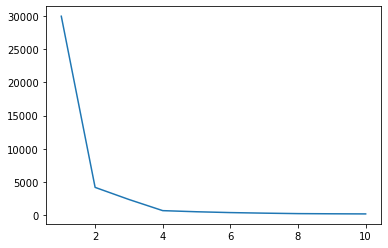

In [57]:
plt.plot(range(1,11),wcss)

In [58]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [59]:
y_means

array([1, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 0, 3, 1,
       3, 1, 1, 3, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 2, 0, 1, 0, 1, 3, 3, 1,
       2, 2, 3, 0, 2, 0, 1, 1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 3, 3, 2, 1, 2,
       3, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 2, 1, 3, 3, 2, 0, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 2, 2,
       3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 3, 1, 3, 0, 1, 3, 3, 0,
       1, 1, 0, 2, 0, 1, 3, 3, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 3, 0, 2, 0, 3, 1, 2, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 3,
       2, 0, 1, 2, 2, 0, 0, 0, 3, 1, 3, 3, 2, 0, 3, 3, 1, 1, 3, 1, 2, 0,
       0, 2])

In [60]:
X[y_means==3,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

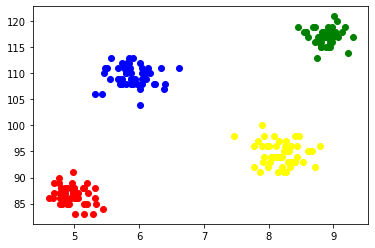

In [61]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

In [62]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)


In [63]:
X.shape

(200, 3)

In [64]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [65]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

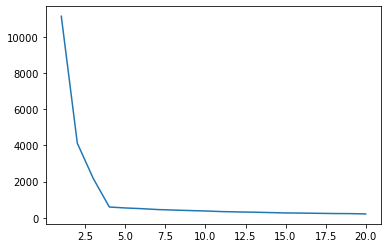

In [66]:
plt.plot(range(1,21),wcss)

In [67]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [68]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [69]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()

In [70]:
%%writefile kmean.py
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

        
        

Overwriting kmean.py


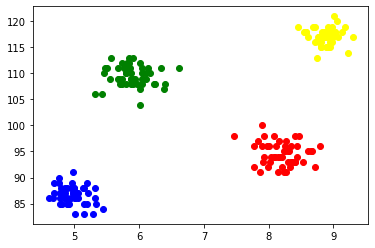

In [71]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from kmean import KMeans
import pandas as pd 

df = pd.read_csv('student_clustering.csv')

X = df.iloc[:,:].values 

km = KMeans(n_clusters=4,max_iter=100)
y_means = km.fit_predict(X)


plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()



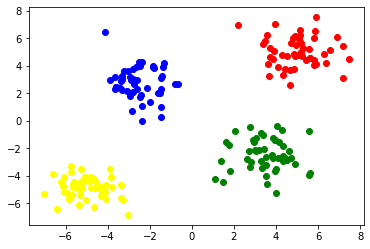

In [74]:
from sklearn.datasets import make_blobs
from kmean import KMeans



centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

km=KMeans(n_clusters=4,max_iter=100)
y_means=km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()